[nltk_data] Downloading package stopwords to C:\Users\DURGA
[nltk_data]     PRASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.56      0.71         9
     neutral       0.00      0.00      0.00         3
    positive       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.62      0.52      0.55        56
weighted avg       0.84      0.88      0.84        56


Confusion Matrix:


C:\Users\DURGA PRASAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DURGA PRASAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DURGA PRASAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

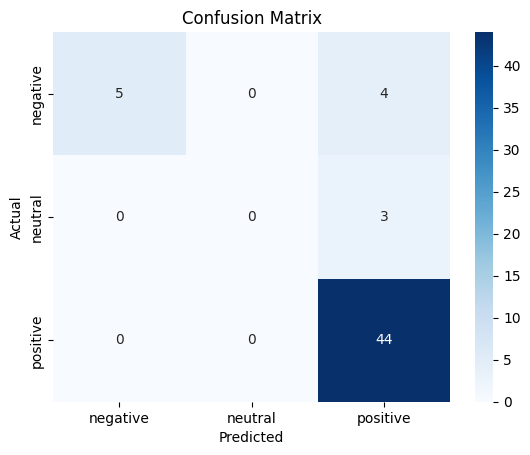

In [7]:
# 📌 SECTION 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download stopwords
nltk.download('stopwords')

# 📌 SECTION 2: Load the Dataset
# Update with the correct path if needed
df = pd.read_csv("redmi6.csv", encoding="ISO-8859-1")

# Extract numeric rating
df['Rating_num'] = df['Rating'].str.extract(r'(\d\.\d)').astype(float)

# Label sentiment based on rating
def label_sentiment(rating):
    if rating <= 2.0:
        return 'negative'
    elif rating == 3.0:
        return 'neutral'
    else:
        return 'positive'

df['Sentiment'] = df['Rating_num'].apply(label_sentiment)

# Drop nulls
df = df.dropna(subset=['Comments', 'Sentiment'])

# Display value counts
df['Sentiment'].value_counts()

# 📌 SECTION 3: Text Preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))  # remove special characters
    text = text.lower().split()  # lowercase & tokenize
    text = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['cleaned_comments'] = df['Comments'].apply(preprocess)
df[['Comments', 'cleaned_comments', 'Sentiment']].head()

# 📌 SECTION 4: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_comments']).toarray()
y = df['Sentiment']
# 📌 SECTION 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 📌 SECTION 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
# 📌 SECTION 7: Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
